In [1]:
import pandas as pd

In [16]:
# We chose the chunk size to be 10**6 ( 1 million) because the orginal data was huge to load.
chunksize = 10**6
csv_files = ['2019-Oct.csv', '2019-Nov.csv']
profit_per_brand = {}
for csv_file in csv_files:
    month = csv_file.replace('.csv', '')
    profit_per_brand[month] = {}
   
    for df in pd.read_csv(csv_file, chunksize=chunksize):
        #we printed the length of each chunk to check the progress of the loop 
        print(len(df))
        filtered_df = df[df['event_type'] != 'purchase']
       
        profits = filtered_df.groupby('brand')['price'].sum()
        
        for brand, profit in profits.items():
            if brand not in profit_per_brand[month]:
                profit_per_brand[month][brand] = 0
            profit_per_brand[month][brand] = profit_per_brand[month][brand] + profit
            

1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
448764
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
501979


In [36]:
profit_per_brand_df = pd.DataFrame(profit_per_brand)

In [40]:
#We wanted to aggregate the profits at brands so we changed the column names to be more relevant to the problem. We also chose to replace the null values with zeros.
profit_per_brand_df = profit_per_brand_df.fillna(0)
profit_per_brand_df = profit_per_brand_df.reset_index().rename(columns = {'index': 'brand'})

In [41]:
# How much does each brand earn per month? 
print(profit_per_brand_df)

             brand  2019-Oct   2019-Nov
0           a-case  42709.21  193028.12
1          a-derma   3911.75    6213.64
2          a-elita   8120.70   15342.76
3           a-mega  50477.36   64235.33
4         aardwolf   3240.06   17085.04
...            ...       ...        ...
4297  pierrericaud      0.00     284.70
4298       pjmasks      0.00      35.34
4299     slezakrav      0.00     101.84
4300       warrior      0.00     596.22
4301       zmonday      0.00     729.32

[4302 rows x 3 columns]


In [42]:
# Write a function that given the name of a brand in input returns, for each month, its profit.
#Function is filtering out a specific brand for their profit for Oct & Nov
def get_profit(brand_name):
    return profit_per_brand_df[profit_per_brand_df['brand'] == brand_name].to_dict()

profits = get_profit('xiaomi')
print(profits)

{'brand': {2175: 'xiaomi'}, '2019-Oct': {2175: 608972407.180021}, '2019-Nov': {2175: 933775177.1700186}}


In [ ]:
 #CAN BE DELETED
# x * 100 / y... to avoid cases where y=0, we just make y = 0 + 0.00000000000001

In [47]:
losses = ((profit_per_brand_df['2019-Nov'] - profit_per_brand_df['2019-Oct']) * 100 ) / (profit_per_brand_df['2019-Oct'] + 10e-20)

In [50]:
profit_per_brand_df['losses'] = losses

In [52]:
#Using the function you just created, find the top 3 brands that have suffered the biggest losses in earnings between one month and the next, specifing bothe the loss percentage and the 2 months (e.g., brand_1 lost 20% between march and april).
profit_per_brand_df.nsmallest(3, 'losses')

,brand,2019-Oct,2019-Nov,losses
1573,playway,2755.53,0.0,-100.0
1842,slumberjack,243.77,0.0,-100.0
2309,matebo,328.58,0.0,-100.0


In [ ]:
# Is the average price of products of different brands significantly different?

In [65]:
chunksize = 10**6
csv_files = ['2019-Oct.csv', '2019-Nov.csv']
visits_per_date = {}
for csv_file in csv_files:
    
    for df in pd.read_csv(csv_file, chunksize=chunksize):
        print(len(df))
       
        df['date'] = pd.to_datetime(df['event_time']).dt.date
        
        visits = df.groupby('date')['date'].count()
        
        for date, visits in visits.items():
            if date not in visits_per_date:
                visits_per_date[date] = 0
            visits_per_date[date] = visits_per_date[date] + visits
        

1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
448764
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
1000000
501979


In [75]:
visits_per_date_df = pd.DataFrame.from_dict(visits_per_date, orient='index')
visits_per_date_df = visits_per_date_df.reset_index()
visits_per_date_df.columns = ['date', 'visits']

In [88]:
# CAN BE DELETED

visits_per_date_df

,date,visits,day
0,2019-10-01,1244245,1
1,2019-10-02,1191328,2
2,2019-10-03,1127303,3
3,2019-10-04,1417190,4
4,2019-10-05,1330339,5
...,...,...,...
56,2019-11-26,1654879,1
57,2019-11-27,1646456,2
58,2019-11-28,1658378,3
59,2019-11-29,1854426,4


In [84]:
# In what part of the day is your store most visited? 
# Knowing which days of the week or even which hours of the day shoppers are 
# likely to visit your online store and make a purchase may help you improve your strategies. 
# Create a plot that for each day of the week show the hourly average of visitors your store has.

visits_per_date_df['day'] = pd.to_datetime(visits_per_date_df['date']).dt.dayofweek
average_visits_per_day = visits_per_date_df.groupby('day').mean()

# dayofweek - 0 is a Monday, 6 is a Sunday

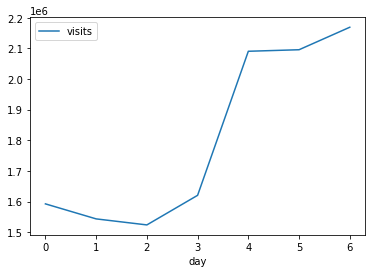

In [87]:
average_visits_per_day.plot()